In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',') 
Y_train = np.loadtxt('labels.csv',delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3 )
Y_train = Y_train.reshape(len(Y_train), 1 )

X_test = X_test.reshape(len(X_test), 100, 100, 3 )
Y_test = Y_test.reshape(len(Y_test), 1 )

X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
print("shape of X_train: ", X_train.shape)
print("shape of Y_train: ", Y_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of Y_test: ", Y_test.shape)

shape of X_train:  (2000, 100, 100, 3)
shape of Y_train:  (2000, 1)
shape of X_test:  (400, 100, 100, 3)
shape of Y_test:  (400, 1)


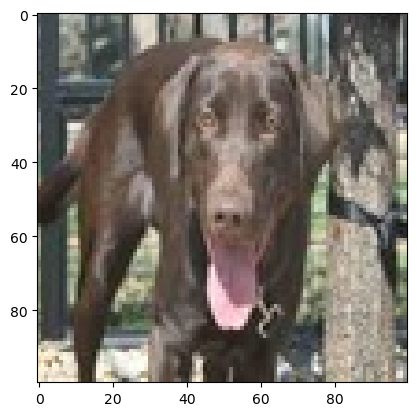

In [23]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [24]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [25]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
# model.add(MaxPooling2D(2,2))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D(2,2))

# model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 7s 209ms/step - loss: 0.0993 - accuracy: 0.9760
Epoch 2/5
32/32 [==============================] - 6s 191ms/step - loss: 0.0830 - accuracy: 0.9790
Epoch 3/5
32/32 [==============================] - 6s 173ms/step - loss: 0.0531 - accuracy: 0.9915
Epoch 4/5
32/32 [==============================] - 6s 184ms/step - loss: 0.0365 - accuracy: 0.9970
Epoch 5/5
32/32 [==============================] - 5s 169ms/step - loss: 0.0227 - accuracy: 0.9980


In [50]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 43ms/step - loss: 1.0421 - accuracy: 0.6975


[1.0420539379119873, 0.6974999904632568]

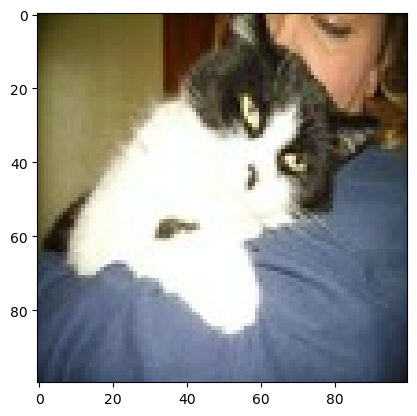

1/1 [==============================] - 0s 44ms/step
model predicted it is :  cat


In [51]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'

else:
    pred = 'cat'

print("model predicted it is : ", pred)